In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading** **Dataset**

In [2]:
emp_data=pd.read_csv('/content/Employee.csv')


**Data Understanding**

In [3]:
#Display first five rows of dataset
emp_data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [4]:
#checking info
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [5]:
#displaying statistical summary
emp_data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [6]:
#shape of dataset
emp_data.shape

(74498, 24)

The employee dataset consists of 74498 rows and 24 columns.

**Data Preprocessing**

In [7]:
#checking for null vallues in numerical columns
numerical_columns = emp_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumerical Columns:", numerical_columns)

# dispaly missing values in numerical columns
missing_numerical = emp_data[numerical_columns].isna().sum()
print("\nMissing values in numerical columns:\n", missing_numerical)


Numerical Columns: ['Employee ID', 'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']

Missing values in numerical columns:
 Employee ID             0
Age                     0
Years at Company        0
Monthly Income          0
Number of Promotions    5
Distance from Home      0
Number of Dependents    6
Company Tenure          0
dtype: int64


In [8]:
#checking for null values in categorical columns
categorical_columns = emp_data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

# dispaly missing values in categorical columns
missing_categorical = emp_data[categorical_columns].isna().sum()
print("\nMissing values in categorical columns:\n", missing_categorical)

Categorical Columns: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']

Missing values in categorical columns:
 Gender                      0
Job Role                    0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Overtime                    0
Education Level             5
Marital Status              4
Job Level                   5
Company Size                2
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64


Handling Missing Values

In [9]:
#handling missing values in numerical columns
emp_data['Number of Promotions'].fillna(emp_data['Number of Promotions'].mean(), inplace=True)
emp_data['Number of Dependents'].fillna(emp_data['Number of Dependents'].mean(), inplace=True)

In [10]:
#handling missing values in categorical columns
emp_data['Work-Life Balance'].fillna(emp_data['Work-Life Balance'].mode()[0], inplace=True)
emp_data['Performance Rating'].fillna(emp_data['Performance Rating'].mode()[0], inplace=True)
emp_data['Education Level'].fillna(emp_data['Education Level'].mode()[0], inplace=True)
emp_data['Marital Status'].fillna(emp_data['Marital Status'].mode()[0], inplace=True)
emp_data['Job Level'].fillna(emp_data['Job Level'].mode()[0], inplace=True)
emp_data['Company Size'].fillna(emp_data['Company Size'].mode()[0], inplace=True)
emp_data['Remote Work'].fillna(emp_data['Remote Work'].mode()[0], inplace=True)
emp_data['Employee Recognition'].fillna(emp_data['Employee Recognition'].mode()[0], inplace=True)

In [11]:
#cross checking whether all null  valueas are filled
emp_data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

Encoding


converting column 'attrition' to binary variable becausce In this case, 'Attrition' indicates whether an employee has left the company ('Yes') or not ('No').
by conveering it into binary variable it is easy to handle in the model training


In [12]:
emp_data['Attrition'] = emp_data['Attrition'].apply(lambda x: 1 if x == 'Left' else 0)



In [13]:
# Encoding categorical variables
emp_data = pd.get_dummies(emp_data, drop_first=True)

Converts the categorical columns using one hot encoding.. One-hot encoding converts categorical variables into a format that these algorithms can understand better.

In [14]:
# Drop 'Employee ID' as it's an identifier
emp_data.drop(columns='Employee ID', inplace=True)

Employee ID is a unique identifier for each employee and does not carry any  information which helps in predicting employee's attributes or likelihood of attrition.thus drooping the column

preprocessed Data

In [15]:
emp_data.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure,Attrition,Gender_Male,Job Role_Finance,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
0,31,19,5390,2.0,22,0.0,89,0,True,False,...,False,False,False,False,False,False,False,False,True,False
1,59,4,5534,3.0,21,3.0,21,0,False,False,...,False,False,False,False,True,False,False,True,False,False
2,24,10,8159,0.0,11,3.0,74,0,False,False,...,False,False,False,False,False,False,True,True,False,False
3,36,7,3989,1.0,27,2.0,50,0,False,False,...,True,True,False,False,False,True,False,False,True,False
4,56,41,4821,0.0,71,0.0,68,0,True,False,...,False,False,False,False,True,False,False,False,True,False


**EDA**

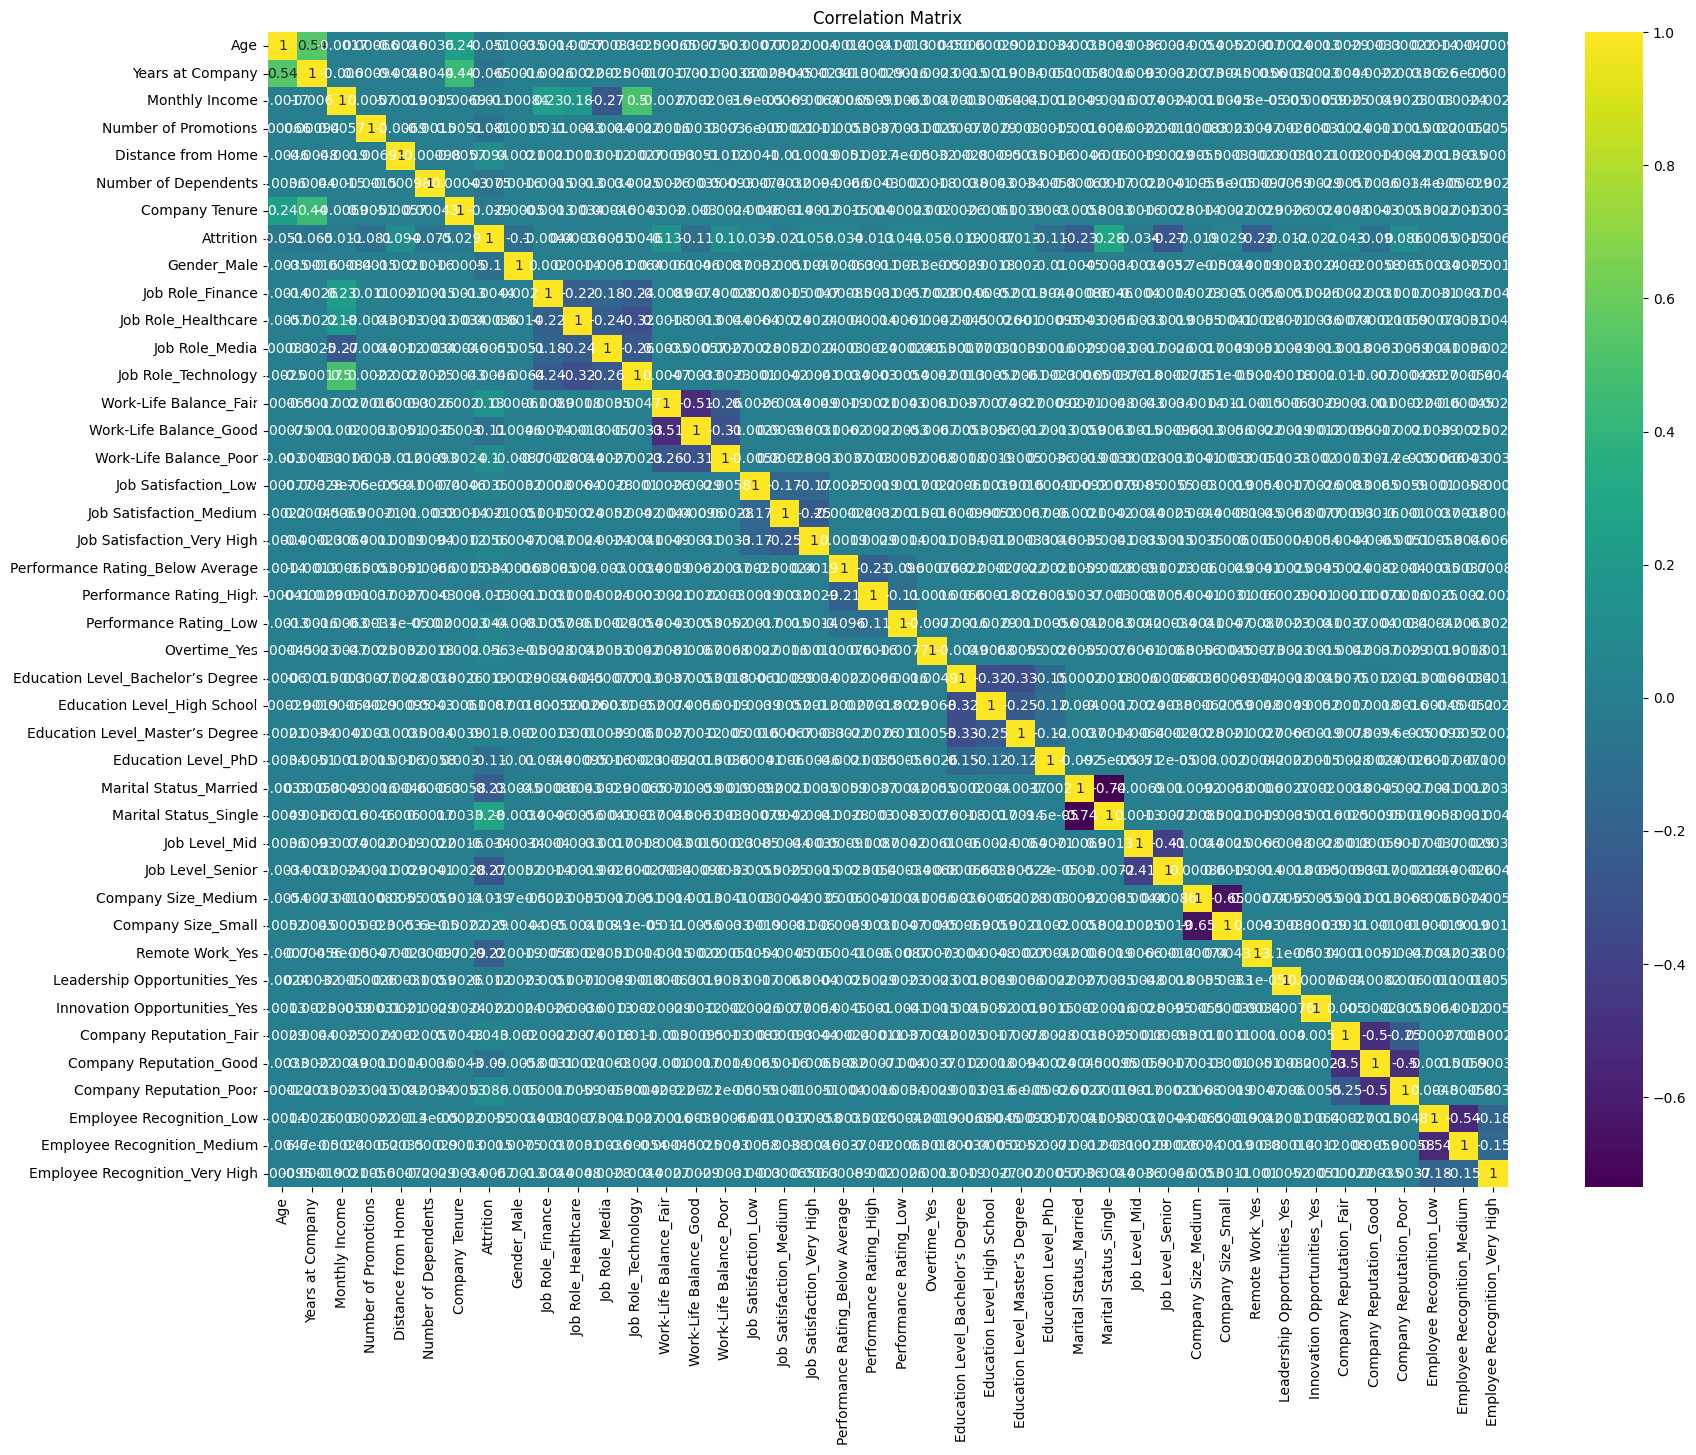

In [16]:
# Visualize the correlation matrix
correlation_matrix = emp_data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

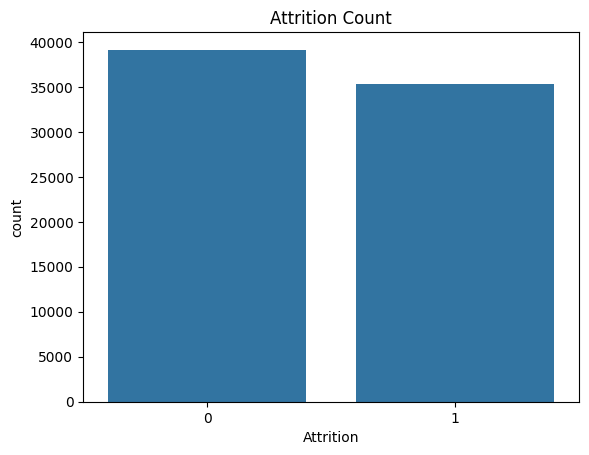

In [17]:
# displaying the distribution of the target variable
sns.countplot(x='Attrition', data=emp_data)
plt.title('Attrition Count')
plt.show()

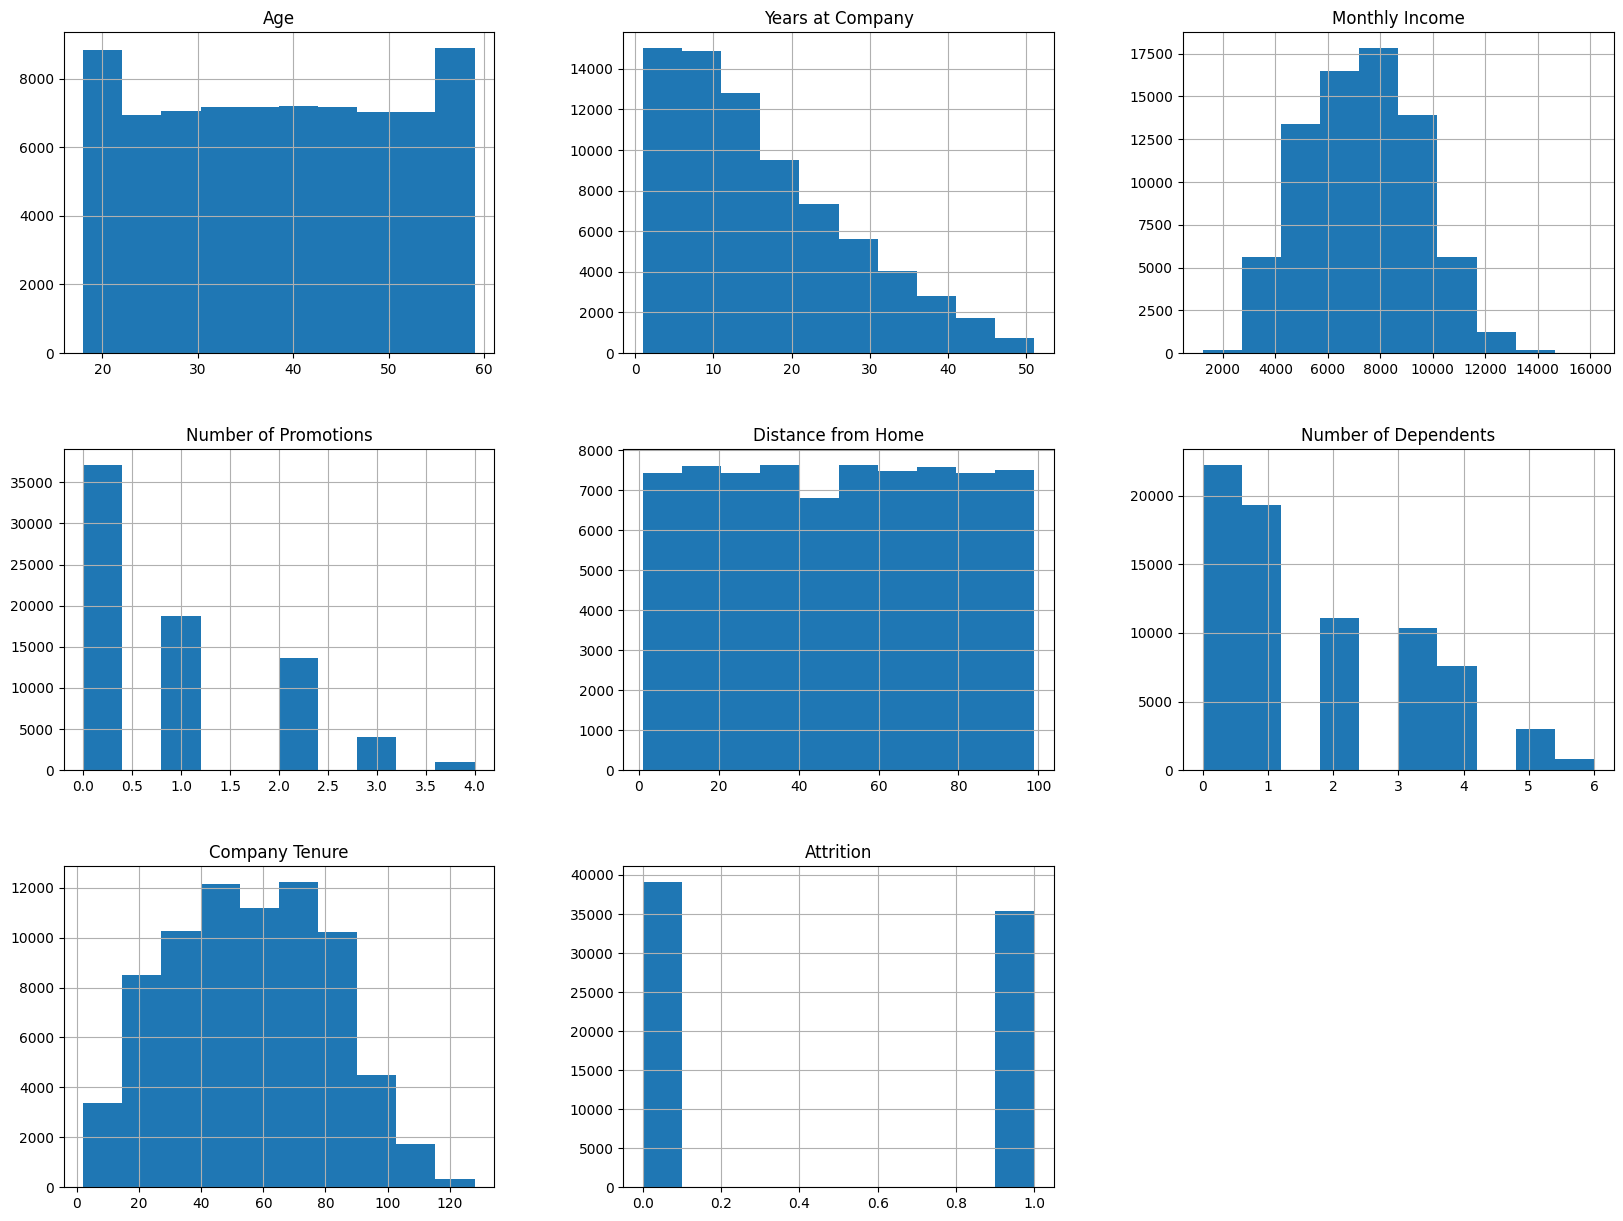

In [18]:
#Distributions of numerical features
emp_data.hist(figsize=(20, 15))
plt.show()

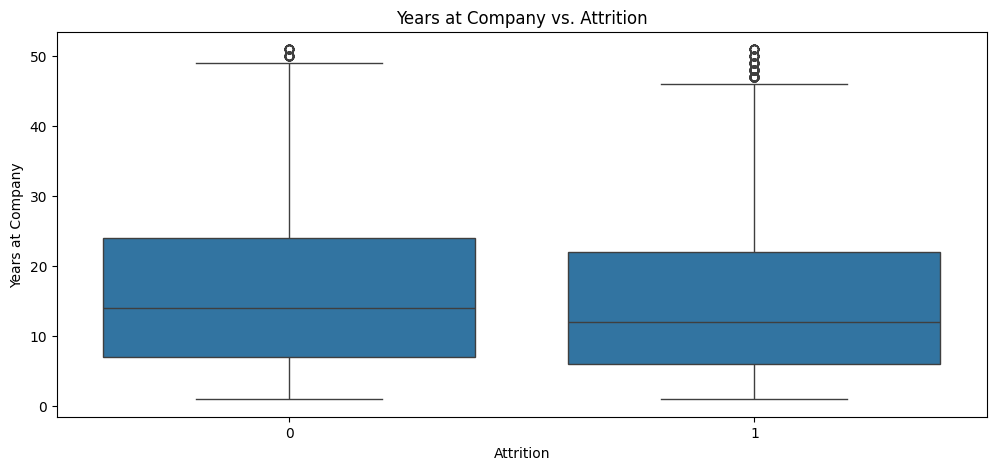

In [19]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='Attrition', y='Years at Company', data=emp_data)
plt.title('Years at Company vs. Attrition')
plt.show()

Handling Outliers

In [20]:
 #Define numerical columns for box plot
numerical_columns = ['Age', 'Years at Company', 'Monthly Income', 'Distance from Home',
                     'Number of Promotions', 'Number of Dependents', 'Company Tenure']

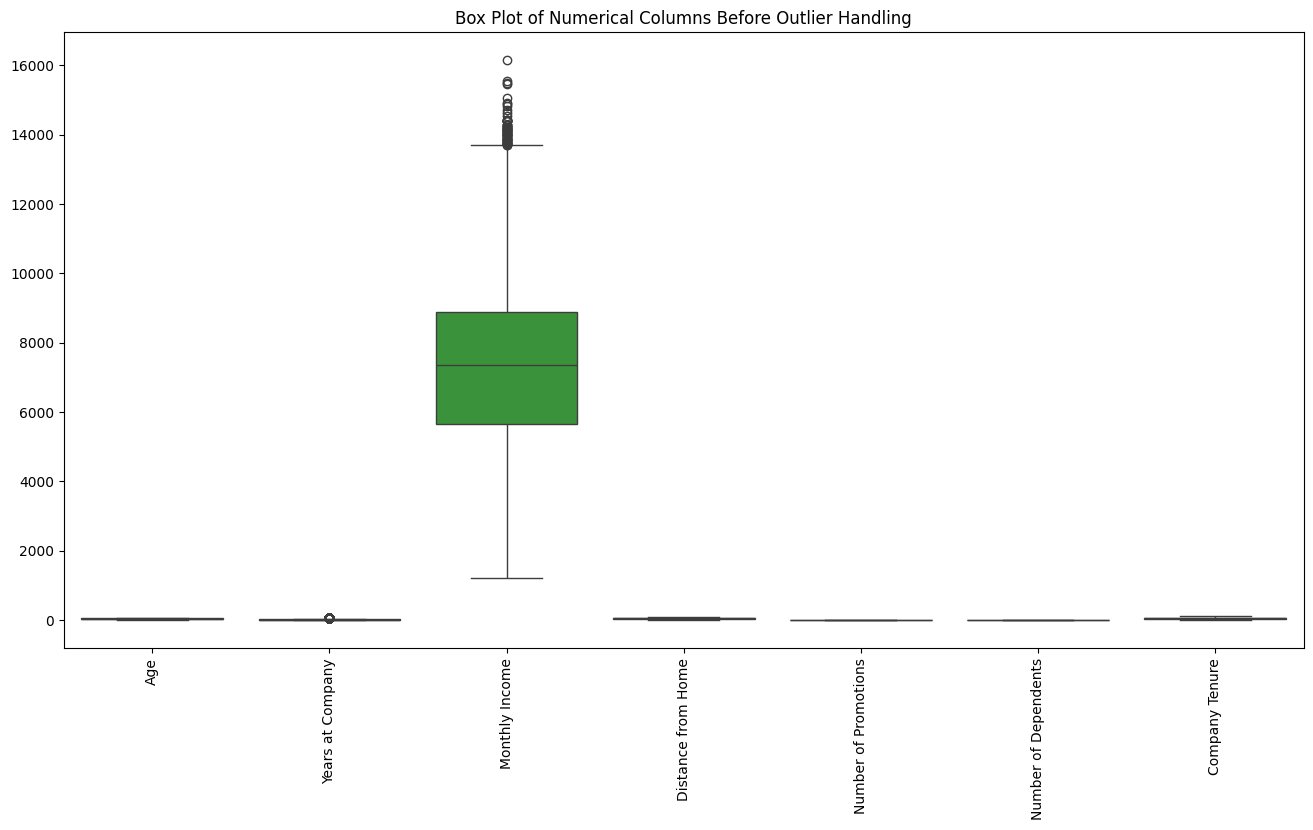

In [21]:
# Plot box plots for numerical columns
plt.figure(figsize=(16, 8))
sns.boxplot(data=emp_data[numerical_columns])
plt.title('Box Plot of Numerical Columns Before Outlier Handling')
plt.xticks(rotation=90)
plt.show()

In [22]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
    return outliers

In [23]:
# Detect outliers using IQR
outliers_iqr = detect_outliers_iqr(emp_data, numerical_columns)
print("\nOutliers detected by IQR method:")
outliers_iqr



Outliers detected by IQR method:


{'Age': [],
 'Years at Company': [465,
  662,
  843,
  1373,
  1567,
  1569,
  1590,
  1913,
  1998,
  2190,
  2287,
  2419,
  2901,
  2949,
  3208,
  3394,
  4344,
  4679,
  4898,
  5263,
  5301,
  5399,
  5517,
  5609,
  5729,
  6177,
  6203,
  6645,
  6702,
  6849,
  7294,
  7537,
  7556,
  7702,
  8049,
  8152,
  8231,
  8530,
  8624,
  8635,
  9208,
  9558,
  9609,
  9614,
  10160,
  10329,
  10491,
  10515,
  10846,
  10934,
  11012,
  11032,
  11049,
  11063,
  11449,
  12525,
  12545,
  12678,
  12783,
  13002,
  13221,
  13939,
  14003,
  14120,
  14181,
  14494,
  14554,
  14641,
  14755,
  15066,
  15700,
  15805,
  16026,
  16156,
  16303,
  16410,
  16740,
  16771,
  16929,
  17036,
  17086,
  17092,
  17479,
  17631,
  18176,
  18888,
  18924,
  19095,
  19142,
  19483,
  19523,
  19546,
  19706,
  20139,
  20334,
  20647,
  21318,
  21765,
  21808,
  21980,
  22194,
  22365,
  22474,
  23493,
  23586,
  23994,
  24062,
  24310,
  24360,
  24500,
  24764,
  24833,
  25581

In [24]:
# Handling outliers: Capping the data
for col in numerical_columns:
    Q1 = emp_data[col].quantile(0.25)
    Q3 = emp_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    emp_data[col] = np.where(emp_data[col] > upper_bound, upper_bound, emp_data[col])
    emp_data[col] = np.where(emp_data[col] < lower_bound, lower_bound, emp_data[col])

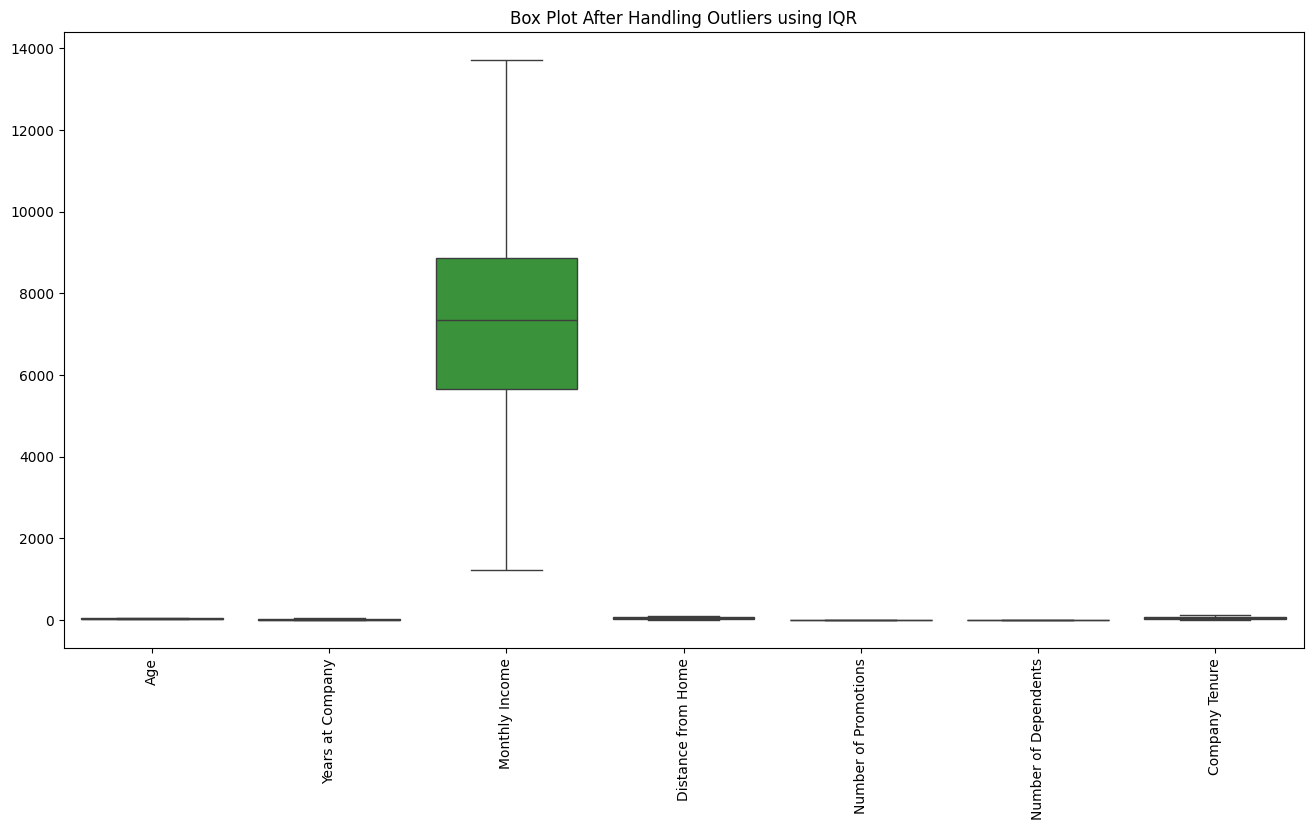

In [25]:
# Step 5: Visualize results with box plots
plt.figure(figsize=(16, 8))
sns.boxplot(data=emp_data[numerical_columns])
plt.title('Box Plot After Handling Outliers using IQR')
plt.xticks(rotation=90)
plt.show()


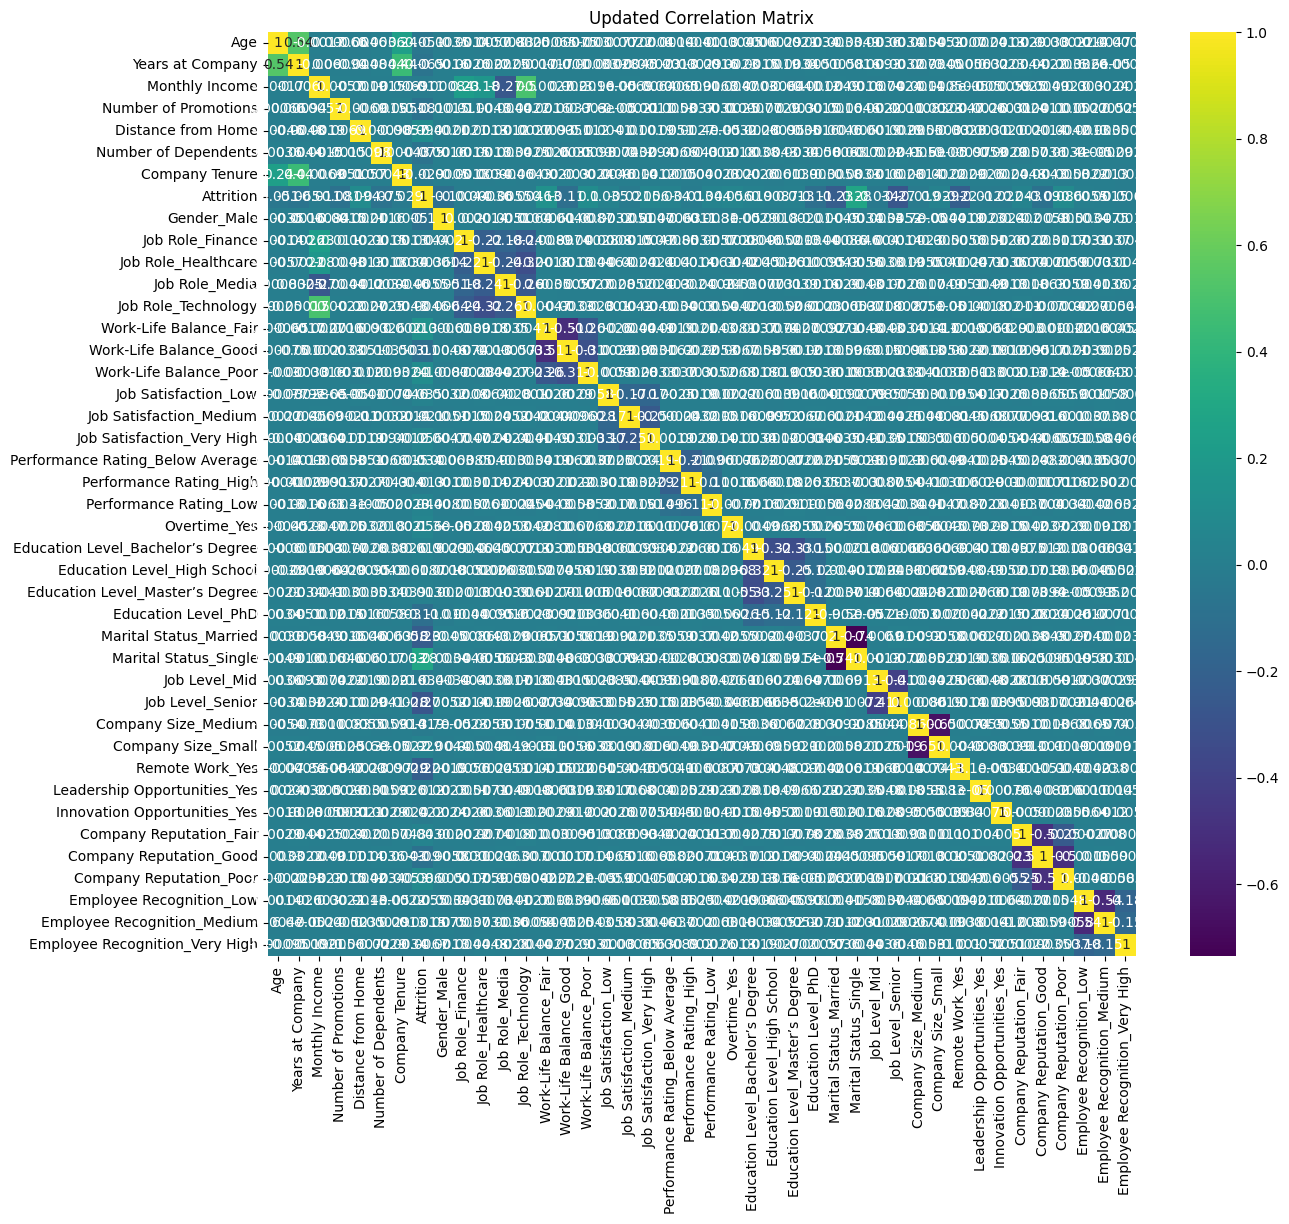

In [26]:
# Plotting the updated correlation matrix
corr_matrix=emp_data.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Updated Correlation Matrix')
plt.show()

In [27]:
emp_data.describe()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure,Attrition
count,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000
mean,38.529746,15.712838,7298.931300,0.832978,49.991584,1.650365,55.727456,0.474778
std,12.083456,11.198333,2151.071131,0.995270,28.513611,1.553597,25.399349,0.499367
min,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000,0.000000
25%,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000,0.000000
50%,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000,0.000000
75%,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000,1.000000
max,59.000000,47.000000,13712.000000,4.000000,99.000000,6.000000,128.000000,1.000000


**Stndard Scaling**

Based on the descriptive statistics provided for the dataset, it appears that the numerical features (Age, Years at Company, Monthly Income, Number of Promotions, Distance from Home, Number of Dependents, Company Tenure) have different ranges and scales.hence we are proceeding with standardization

In [28]:
# Normalize or standardize numerical features if needed
from sklearn.preprocessing import StandardScaler

num_columns = ['Age', 'Monthly Income', 'Distance from Home', 'Company Tenure', 'Number of Dependents', 'Number of Promotions']
sc = StandardScaler()
emp_data[num_columns] = sc.fit_transform(emp_data[num_columns])


In [29]:
#After Standard Scaling
emp_data.describe()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure,Attrition
count,7.449800e+04,74498.000000,7.449800e+04,7.449800e+04,7.449800e+04,7.449800e+04,7.449800e+04,74498.000000
mean,2.114517e-16,15.712838,1.918040e-16,2.708719e-17,-3.302443e-17,4.325366e-17,-1.478350e-17,0.474778
std,1.000007e+00,11.198333,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.499367
min,-1.699008e+00,1.000000,-2.823232e+00,-8.369420e-01,-1.718194e+00,-1.062293e+00,-2.115323e+00,0.000000
25%,-8.714242e-01,7.000000,-7.656383e-01,-8.369420e-01,-8.764850e-01,-1.062293e+00,-7.766966e-01,0.000000
50%,3.891746e-02,13.000000,2.281144e-02,1.678173e-01,2.951710e-04,-4.186217e-01,1.073043e-02,0.000000
75%,8.665008e-01,23.000000,7.331600e-01,1.172577e+00,8.770753e-01,8.687219e-01,7.981575e-01,1.000000
max,1.694084e+00,47.000000,2.981357e+00,3.182095e+00,1.718784e+00,2.799737e+00,2.845468e+00,1.000000


**Splotting Data in Training set and Test Data**

Target variable is attrition

In [30]:
# Split the data into features and target variable
X = emp_data.drop(columns='Attrition')
y = emp_data['Attrition']

In [31]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

we split 20% data into test and 70% of data into training dataset

**MODEL BUILDING**

## 1.Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [33]:
#Ttrain the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [34]:
# Predictions
y_pred_dt = dt.predict(X_test)

In [35]:
# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.667986577181208
Confusion Matrix:
 [[5364 2440]
 [2507 4589]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.69      0.68      7804
           1       0.65      0.65      0.65      7096

    accuracy                           0.67     14900
   macro avg       0.67      0.67      0.67     14900
weighted avg       0.67      0.67      0.67     14900



# 2.Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
#  train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:
# Predictions
y_pred_rf = rf.predict(X_test)

In [39]:
# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7498657718120806
Confusion Matrix:
 [[6075 1729]
 [1998 5098]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.77      7804
           1       0.75      0.72      0.73      7096

    accuracy                           0.75     14900
   macro avg       0.75      0.75      0.75     14900
weighted avg       0.75      0.75      0.75     14900



3. K Nearest Neighbours (KNN)

In [40]:
# Import k-NN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
# Predictions
y_pred_knn = knn.predict(X_test)

In [43]:
# Evaluate the model
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

k-NN Accuracy: 0.6380536912751678
Confusion Matrix:
 [[5069 2735]
 [2658 4438]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.65      0.65      7804
           1       0.62      0.63      0.62      7096

    accuracy                           0.64     14900
   macro avg       0.64      0.64      0.64     14900
weighted avg       0.64      0.64      0.64     14900



In [46]:
# Summarize accuracy of all models
models = ['Decision Tree', 'Random Forest', 'k-NN']
accuracies = [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_knn)]

for model, accuracy in zip(models, accuracies):
    print(f"{model} Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 0.67
Random Forest Accuracy: 0.75
k-NN Accuracy: 0.64


Among the models evaluated (Decision Tree, Random Forest, knn), the Random Forest classifier achieved the highest accuracy of 0.75. This indicates that Random Forest was able to predict employee attrition more accurately compared to the other models for the given dataset..